In [179]:
from patchedimage import PatchedImage
from utilities import *

def below_line(x,y, a,b, c,d):
    if a == c:
        return x < a
    else:
        return y - ((d-b)/(c-a)*(x-a)+b) > 0 


def compute_normal(zone, coord):
    i,j = coord
    if zone[i,j] != 1:
        raise ValueError('trying to calculate normal vector not in frontier')
        
    border_neighbors = []
    target_neighbors = (-1,-1)
    for di in range(-1, 2):
        for dj in range(-1, 2):
            ni, nj = i + di, j + dj
            if di == 0 and dj == 0:
                continue  # Skip the center point itself
            if zone[ni,nj] == 1:
                border_neighbors.append((ni, nj))
            elif zone[ni,nj] == 0:
                target_neighbors = (ni,nj)

    border_neighbors=sorted(border_neighbors)
    a,b,c,d = border_neighbors[0][0],border_neighbors[0][1],border_neighbors[-1][0],border_neighbors[-1][1]
    x,y = target_neighbors
    print(border_neighbors)
    tengeante_x,tengeante_y = a-c,b-d
    norme = (tengeante_x**2+tengeante_y**2)**0.5

    if below_line(x,y, a,b, c,d): #j'ai rajouté le +1e-3 pour éviter la division par 0 (peut etre pas la meilleure solution)
        return (-tengeante_y/norme,tengeante_x/norme)
    else:
        return (tengeante_y/norme,-tengeante_x/norme)

[(1, 0), (1, 2)]
(-1.0, 0.0)


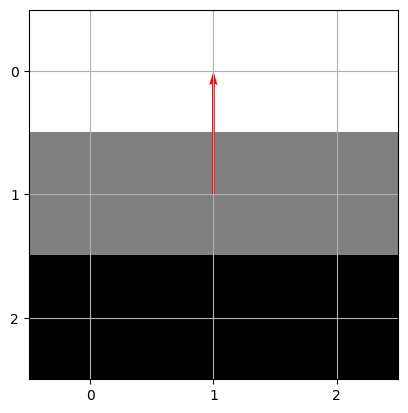

In [180]:
zone = np.array([[2,2,2],
                 [1,1,1],
                 [0,0,0]])

normal_vector = compute_normal(zone, (1,1))

# Plot the matrix and the vector normal
fig, ax = plt.subplots()
ax.imshow(zone, cmap='gray', origin='upper')

# Coordinates of the center
center_x, center_y = 1, 1

# Normal vector components
u, v = normal_vector
print(normal_vector)
# Plot the normal vector using quiver
ax.quiver(center_x, center_y, v, u, angles='xy', scale_units='xy', scale=1, color='red')

# Set the axis limits and labels
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(2.5, -0.5)
ax.set_xticks(range(3))
ax.set_yticks(range(3))
ax.grid(True)

plt.show()